# Analysing the Impact of Agricultural CO2 emissions on Climate Change


<div id="agriculture", align="center">

  <img src="agriculture.jpg" width="1000" height="500" alt=""/>

</div>

## Table of Contents

- <b> [1. Project Overview](#1-project-overview)
    - [1.1. Introduction](#11-introduction)
    - [1.2. Objective](#12-objective)
- <b> [2. Importing Packages](#2-importing-packages)
- <b> [3. Data Loading and Inspection](#3-data-loading-and-inspection)
- <b> [4. Data Cleaning](#4-data-cleaning)
- <b> [5. Exploratory Data Analysis (EDA)](#5-exploratory-data-analysis)
- <b> [6. Feature Engineering](#6-feature-engineering)</b>
- <b> [7. Model Development](#7-model-development)</b>
- <b> [8. Model Performance](#8-model-performance)
- <b> [9. Conclusion and Insights](#9-conclusion-and-recommendations)</b>


## 1. Project Overview <a class="anchor" id="chapter1"></a>

### 1.1 Introduction <a class="anchor" id="section_1_1"></a>

Climate change is a global issue that has significant ramifications on the environment. Its a weather phenomenon defined as the long-term significant shift in weather and temperature conditions. It is caused by greenhouse gas emissions that trap the sun's heat, typically carbon dioxide (CO2) or methane (CH4), which results in global temperature upsurges. Various industries and sectors contribute to global emissions. The agricultural sector is responsible for a third of these emissions as one of the leading sources of CO2 emissions and biodiversity loss. The investigation and comprehension of the effect the sector has on climate change trends is paramount for devising effective mitigation strategies and implementing sustainable agricultural practices. Such strategies and practises may include agroforestry, crop rotation, biodynamic agriculture and Renewanble energy integration. 

The main objective of this project is to investigate and comprehend the impact of agricultural activities on climate change. This is fulfilled by analysing and predicting the effect of various CO2 emission sources on climate change. Consequently, uncovering underlying patterns and key insights to inform strategy development. The analyses is conducted using data retrieved from the Food and Agriculture Organization (FAO) and the Intergovernmental Panel on Climate Change (IPCC) for various countries/areas. The dataset comprises of the average temperature variations in Celcius (&deg;C), the carbon dioxide emissions from several sources and the total emissions  in kilotonnes (kt) for the year 1990 to 2020. Climate change is represented as the trend in temperature variations observed in an area. A higher variation denotes extreme climate change, whereas a lower variation indicates a stable climate. The variation can either be positive or negative, describing a warming and cooling climate repectively. The CO2 sources are given as:
*   Savanna fires 
*   Forest fires 
*   Crop Residues
*   Rice Cultivation
*   Drained organic soils (CO2)
*   Pesticides Manufacturing
*   Food Transport
*   Forestland
*   Net Forest conversion
*   Food Household Consumption
*   Food Retail
*   On-farm Electricity Use
*   Food Packaging
*   Agrifood Systems Waste Disposal
*   Food Processing
*   Fertilizers Manufacturing
*   IPPU
*   Manure applied to Soils
*   Manure Management
*   Fires in organic soils
*   Fires in humid tropical forests
*   On-farm energy use
*   Rural population
*   Urban population
*   Total Male Population
*   Total Female Population

A thorough data analysis procedure is employed, followed by regression predictive modelling. The procedure is embedded in the structure of this notebook. The notebook consists of several sections and exploits python's extensive capabilities by utilizing regression, data analysis and visulisation libraries. The first section imports python packages essential for analysis. The data loading section loads and inspects the dataset for errors and/or data consistencies. The subsequent section cleans the dataset by handling the errors and data consistencies found, preparing it for analysis. The exploratory data analysis section draws valuable insights from the dataset using statistical techniques and data visualisations. In the feature engineering section, the dataset is prepared for regression modelling. The predictive model is developed and evaluated in the model development and model performance sections accordingly. The insights gathered from both analyses will highlight the impact of agricultural activities on climate change and will be reviewed in the conclusions and recommendation section. Here suitable mitigation strategies are discussed at length and recommended to the stakeholders for implementation. 


### 1.2 Objective <a class="anchor" id="section_1_2"></a>

The key objectives are defined as follows:

*   To perform exploratory data analysis on the agricultural emissions dataset.
*   To identify the relationship between CO2 emmisions and temperature variations.
*   To identify and describe the global trend for climate change.
*   To identify emission sources that are significant contributors of CO2 emissions and have major influence on temperature variations.
*   To perform regression analysis on the agricultural emissions dataset.
*   To develop a regression model to predict temperature variations.
*   To offer actionable insights to agricultural stakeholders including policymakers and agricultural organisations.


## 2. Importing Packages <a class="anchor" id="chapter2"></a>

In this segment, the library packages necessary for data analysis and regression analysis are imported. The main libraries are:
*   <b>*Pandas:*</b> Stores data in DataFrames and facilitates data manipulation and analysis.
*   <b>*Numpy:*</b> Assists in data manipulation by supporting numerical computations on data array.
*   <b>*Matplotlib:*</b> Used to create static and interactive data visualisations.
*   <b>*Seaborn:*</b>  Builds upon the matplotlib library by creating visually appealing data visualisations.
*   <b>*Sklearn:*</b> Used to build and evaluate machine learning models.

The `%matplotlib inline` line ensure the figures generated by matplotlib are placed within the notebook. Additionally, the warnings library is imported for the supression of raised warnings. This is to avoid  unneccessary interruptions during code execution. 


In [92]:
## Libraries for data manipulation and analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Libraries for regression analysis
from sklearn.model_selection import train_test_split  #Splits dataframe into training and testing set
from sklearn.preprocessing import StandardScaler #Scales data

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet  #Various linear regression model regressors
from sklearn.tree import DecisionTreeRegressor #Decision tree regressor

from sklearn.ensemble import RandomForestRegressor, BaggingRegressor,  AdaBoostRegressor #Ensemble methods regressors

from sklearn.metrics import mean_squared_error, r2_score    #Evaluates model evaluation

## Displays output inline
%matplotlib inline

## Libraries for Handing Warnings
import warnings
warnings.filterwarnings('ignore')

## 3. Data Loading and Inspection <a class="anchor" id="chapter3"></a>

*Brief section introduction

In [93]:
#reading the dataset into a dataframe
df = pd.read_csv('co2_emissions_from_agri.csv')
#display first five columns of dataframe
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


*   **Savanna fires:** Emissions from fires in savanna ecosystems.
*   **Forest fires:** Emissions from fires in forested areas.
*   **Crop Residues:** Emissions from burning or decomposing leftover plant material after crop harvesting.
*   **Rice Cultivation:** Emissions from methane released during rice cultivation.
*   **Drained organic soils (CO2):** Emissions from carbon dioxide released when draining organic soils.
*   **Pesticides Manufacturing:** Emissions from the production of pesticides.
*   **Food Transport:** Emissions from transporting food products.
*   **Forestland:** Land covered by forests.
*   **Net Forest conversion:** Change in forest area due to deforestation and afforestation.
*   **Food Household Consumption:** Emissions from food consumption at the household level.
*   **Food Retail:** Emissions from the operation of retail establishments selling food.
*   **On-farm Electricity Use:** Electricity consumption on farms.
*   **Food Packaging:** Emissions from the production and disposal of food packaging materials.
*   **Agrifood Systems Waste Disposal:** Emissions from waste disposal in the agrifood system.
*   **Food Processing:** Emissions from processing food products.
*   **Fertilizers Manufacturing:** Emissions from the production of fertilizers.
*   **IPPU:** Emissions from industrial processes and product use.
*   **Manure applied to Soils:** Emissions from applying animal manure to agricultural soils.
*   **Manure left on Pasture:** Emissions from animal manure on pasture or grazing land.
*   **Manure Management:** Emissions from managing and treating animal manure.
*   **Fires in organic soils:** Emissions from fires in organic soils.
*   **Fires in humid tropical forests:** Emissions from fires in humid tropical forests.
*   **On-farm energy use:** Energy consumption on farms.
*   **Rural population:** Number of people living in rural areas.
*   **Urban population:** Number of people living in urban areas.
*   **Total Population - Male:** Total number of male individuals in the population.
*   **Total Population - Female:** Total number of female individuals in the population.
*   **total_emission:** Total greenhouse gas emissions from various sources.
*   **Average Temperature °C:** The average increasing or decreasing of temperature (by year) in degrees Celsius

CO2 is recorded in kilotonnes (kt) and  1 kt represents 1000 kg of CO2.

## 4. Data Cleaning <a class="anchor" id="chapter4"></a>


<b>Data cleaning and preprocessing</b>  help data management. It involves identifying or /and removing errors and inconsistencies, ensures that it accuracy and providing reliable outputs.by cleaning we are eliminating errors, duplicates, and inconsistencies, unnecessary data.The main objectives of data preprocessing are to improve data quality, enhance the performance of models, and ensure the reliability of analytical results. We reduce the risk of mistakes in analysis and EDA and model development.

</div>


In [94]:
#renaming features to adhere to python naming standards
df= df.rename(columns = {'Average Temperature °C' : 'average_temperature_change', 'Total Population - Female' : 'female_population', 'Total Population - Male':'male_population', 'Urban population': 'urban_population', 'Rural population':'rural_population', 'On-farm energy use' : 'on_farm_energy_use' , 'Fires in humid tropical forests' : 'fires_in_humid_tropical_forests'
                         ,'Fires in organic soils' : 'fires_in_organic_soils', 'Manure Management' : 'manure_management', 'Manure left on Pasture': 'manure_left_on_pasture', 'Manure applied to Soils' : 'manure_applied_to_soils','Fertilizers Manufacturing' : 'fertilizers_manufacturing', 'Food Processing' : 'food_processing', 'Agrifood Systems Waste Disposal' : 'agrifood_systems_waste_disposal'
                         ,'Food Packaging' :'food_packaging', 'On-farm Electricity Use': 'on_farm_electricity_use', 'Food Retail' : 'food_retail' , 'Food Household Consumption' : 'food_household_consumption' , 'Net Forest conversion' : 'net_forest_conversion', 'Forestland': 'forestland', 'Food Transport' : 'food_transport', 'Pesticides Manufacturing' : 'pesticides_manufacturing'
                         ,'Drained organic soils (CO2)': 'drained_organic_soils', 'Rice Cultivation' : 'rice_cultivation', 'Crop Residues':'crop_residues', 'Forest fires':'forest_fires', 'Savanna fires': 'savanna_fires', 'Area' :'area', 'Year' : 'year'})

df.head()                     

,area,year,savanna_fires,forest_fires,crop_residues,rice_cultivation,drained_organic_soils,pesticides_manufacturing,food_transport,forestland,...,manure_management,fires_in_organic_soils,fires_in_humid_tropical_forests,on_farm_energy_use,rural_population,urban_population,male_population,female_population,total_emission,average_temperature_change
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


In [95]:
#Checking for null values per column
print("Null Values in each column:")
print(df.isnull().sum())

Null Values in each column:
area                                  0
year                                  0
savanna_fires                        31
forest_fires                         93
crop_residues                      1389
rice_cultivation                      0
drained_organic_soils                 0
pesticides_manufacturing              0
food_transport                        0
forestland                          493
net_forest_conversion               493
food_household_consumption          473
food_retail                           0
on_farm_electricity_use               0
food_packaging                        0
agrifood_systems_waste_disposal       0
food_processing                       0
fertilizers_manufacturing             0
IPPU                                743
manure_applied_to_soils             928
manure_left_on_pasture                0
manure_management                   928
fires_in_organic_soils                0
fires_in_humid_tropical_forests     155
on_farm_ener

In [96]:
#Replacing Missing Values with zero
df[['savanna_fires', 'forest_fires', 'crop_residues', 'forestland', 'net_forest_conversion', 'food_household_consumption', 'IPPU','manure_applied_to_soils','manure_management', 'fires_in_humid_tropical_forests', 'on_farm_energy_use']] = df[['savanna_fires', 'forest_fires', 'crop_residues', 'forestland', 'net_forest_conversion', 'food_household_consumption', 'IPPU','manure_applied_to_soils','manure_management', 'fires_in_humid_tropical_forests', 'on_farm_energy_use']].fillna(0)

The empty cells are specific to specific areas, hence their replacement with zero

In [97]:
# Function to count duplicate rows
def count_duplicate_rows(df):
    """
    Count and display the number of duplicate rows in the DataFrame.

    Parameters:
        df (DataFrame): The input DataFrame.

    Returns:
        int: Number of duplicate rows.
    """
    duplicate_count = df.duplicated().sum()
    print(f"Total number of duplicate rows: {duplicate_count}")
    return duplicate_count

# Function to preprocess data
def preprocess_data(df):
    """
    Preprocess the data by handling missing values and removing non-essential columns.

    Parameters:
        df (DataFrame): The input DataFrame to preprocess.
    """
    # Fill missing values for numerical and categorical columns
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            df[column].fillna(df[column].median(), inplace=True)
        elif df[column].dtype == 'object':
            df[column].fillna(df[column].mode()[0], inplace=True)

    # Drop non-essential columns
    non_essential_columns = ['ID', 'Location']  # Specify non-essential columns here
    df.drop(columns=non_essential_columns, inplace=True, errors='ignore')

# Example usage
# Count duplicate rows in the DataFrame
duplicate_count = count_duplicate_rows(df)

# Preprocess the DataFrame
preprocess_data(df)

# Display the first few rows of the preprocessed DataFrame
df.head()


Total number of duplicate rows: 0


,area,year,savanna_fires,forest_fires,crop_residues,rice_cultivation,drained_organic_soils,pesticides_manufacturing,food_transport,forestland,...,manure_management,fires_in_organic_soils,fires_in_humid_tropical_forests,on_farm_energy_use,rural_population,urban_population,male_population,female_population,total_emission,average_temperature_change
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,0.0,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,0.0,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,0.0,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,0.0,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,0.0,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


*Insights/comments

In [98]:
def remove_excessive_missing_data(df, row_threshold=0.5, col_threshold=0.5):
    """
    Removes rows and columns with missing data exceeding the specified thresholds.

    Parameters:
        df (DataFrame): The input DataFrame to clean.
        row_threshold (float): The maximum allowable proportion of missing values in a row (default: 0.5).
        col_threshold (float): The maximum allowable proportion of missing values in a column (default: 0.5).

    Returns:
        DataFrame: The cleaned DataFrame with rows/columns removed.
    """
    # Remove columns with missing values exceeding the threshold
    col_limit = int(df.shape[0] * col_threshold)
    df.dropna(axis=1, thresh=col_limit, inplace=True)

    # Remove rows with missing values exceeding the threshold
    row_limit = int(df.shape[1] * row_threshold)
    df.dropna(axis=0, thresh=row_limit, inplace=True)

    return df

# Example Usage
# Define thresholds (e.g., keep rows and columns with at least 50% non-NaN values)
cleaned_df = remove_excessive_missing_data(df, row_threshold=0.5, col_threshold=0.5)

# Display the cleaned DataFrame
print(cleaned_df.head())

          area  year  savanna_fires  forest_fires  crop_residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   rice_cultivation  drained_organic_soils  pesticides_manufacturing  \
0            686.00                    0.0                 11.807483   
1            678.16                    0.0                 11.712073   
2            686.00                    0.0                 11.712073   
3            686.00                    0.0                 11.712073   
4            705.60                    0.0                 11.712073   

   food_transport  forestland  ...  manure_management  fires_in_organic_soils  \
0         63.1152   -2388.803  ...           319.1763                     0.0

## 5. Exploratory Data Analysis <a class="anchor" id="chapter5"></a>

In this analysis, we will explore the relationship between various factors affecting emissions, temperature, and other environmental variables. The dataset provided includes emissions data for different areas and years, including factors like crop residues, food consumption, transportation, and fertilizers manufacturing. Our objective is to visualize these relationships through various statistical and graphical methods.

**Correlation Matrix Heatmap**

We begin by examining the correlations between various variables to understand how they relate to each other.

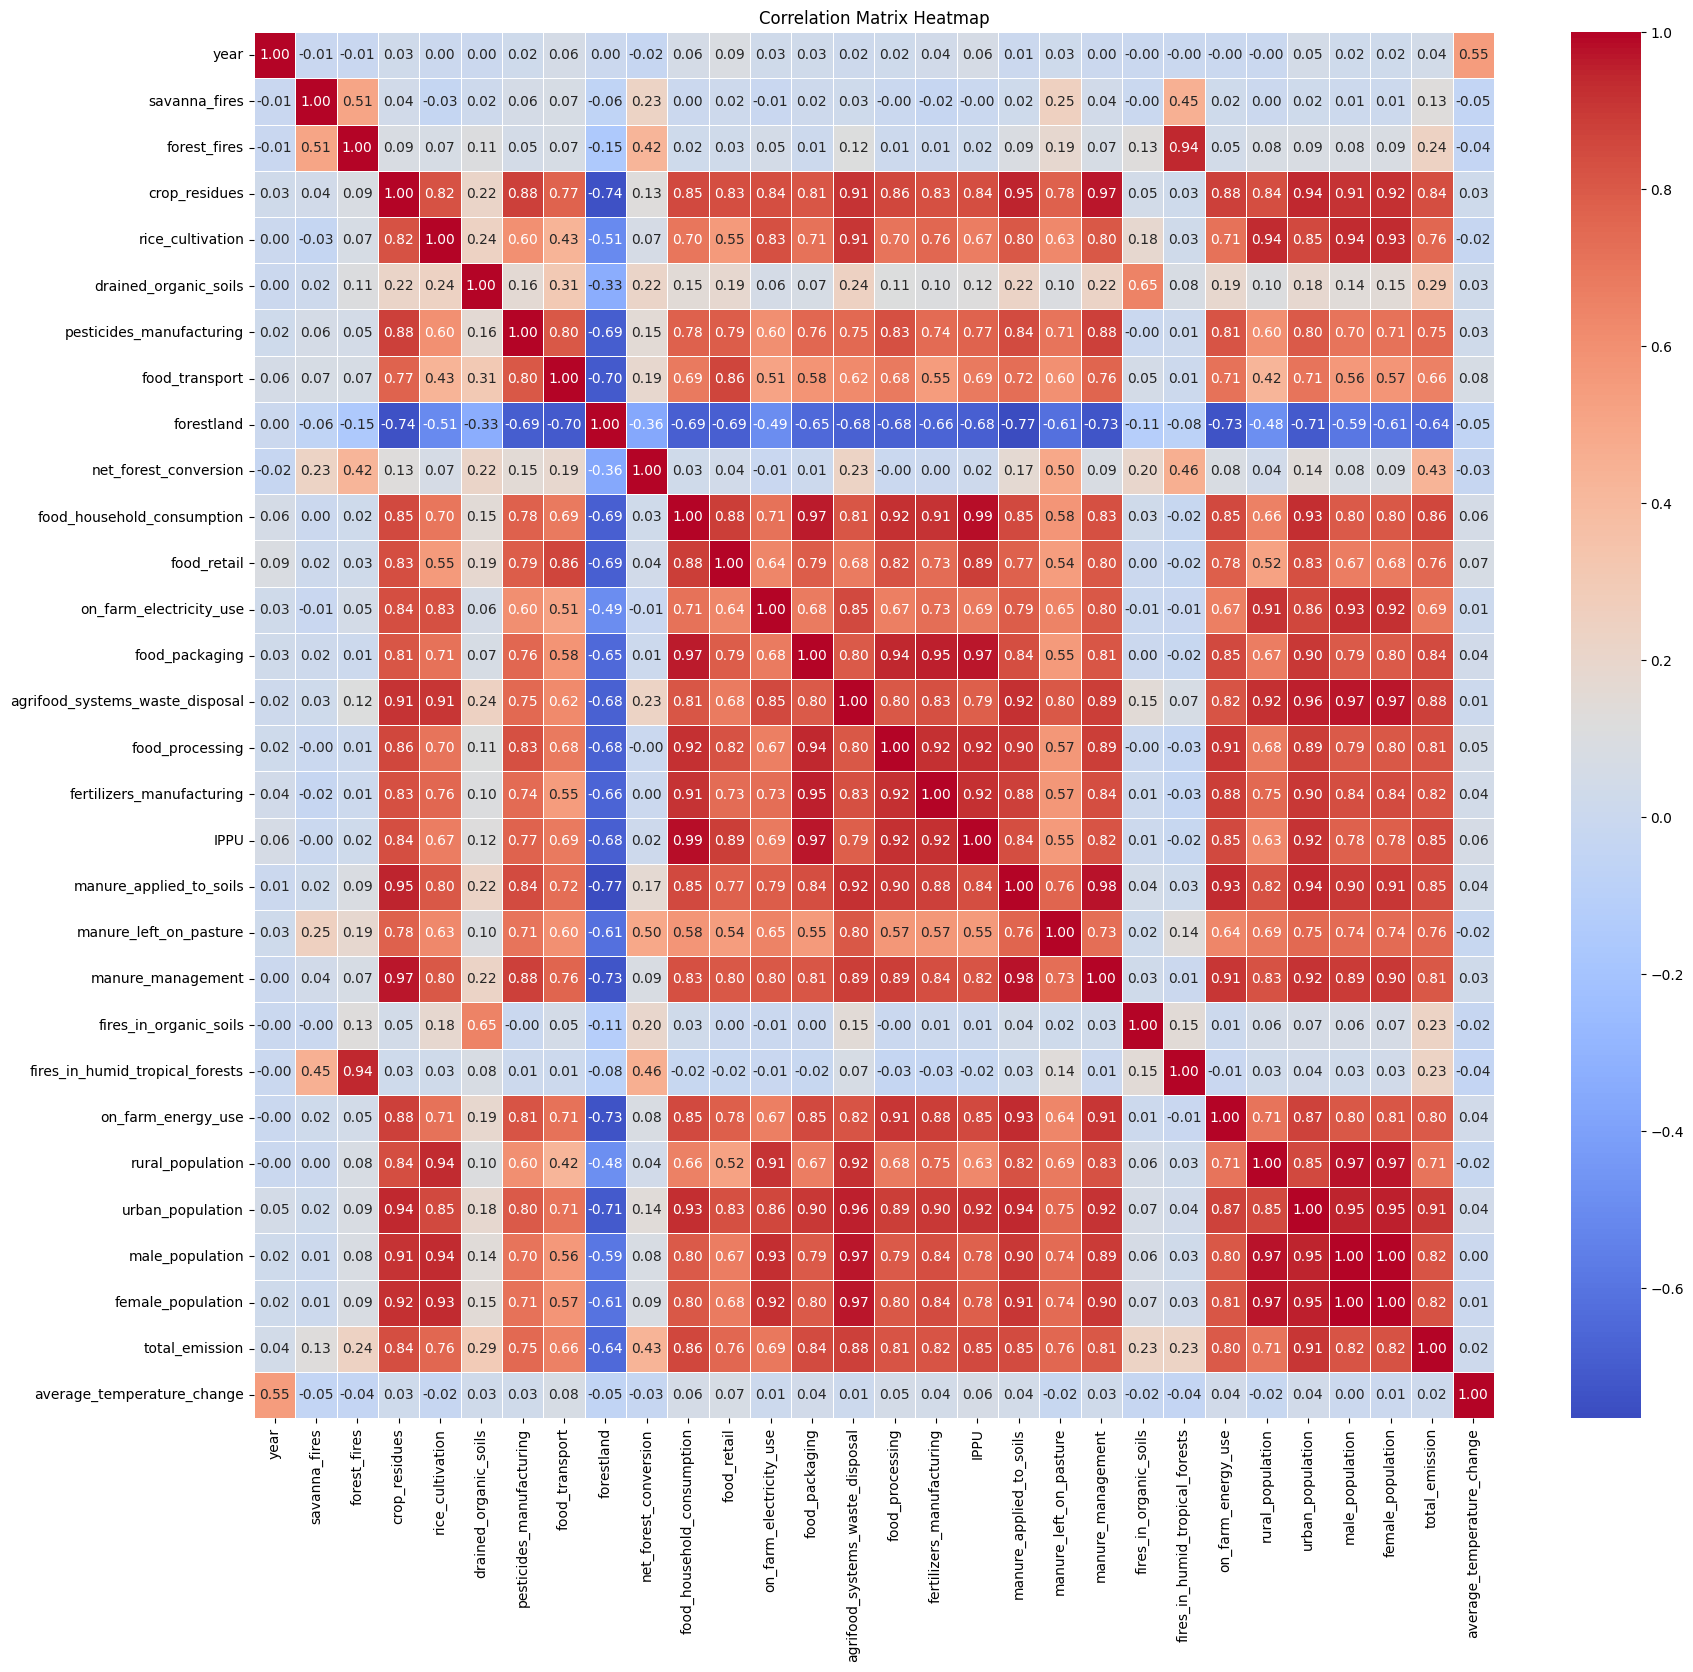

In [99]:
# Dropping the 'Area' column and calculating the correlation matrix
ndf = df.drop('area', axis=1)
correlation_matrix = ndf.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)

# Adding title and showing the plot
plt.title('Correlation Matrix Heatmap')
plt.show()

**Insights for `total_emissions`:**
1. **Strong Positive Correlations:**
   - `total_emissions` has a **strong positive correlation** with `female_population` (0.82), `male_population` (0.82), and `urban_population` (0.91), indicating that areas with higher populations, especially in urban areas, tend to have higher total emissions.
   - `total_emissions` is also highly correlated with several agricultural and food-related variables, such as:
     - `manure_management` (0.81)
     - `manure_left_on_pasture` (0.76)
     - `manure_applied_to_soils` (0.85)
     - `fertilizers_manufacturing` (0.82)
     - `food_processing` (0.81)
     - `agrifood_systems_waste_disposal` (0.88)
     - `food_packaging` (0.84)
     - `food_household_consumption` (0.86)
     - `food_transport` (0.66)
     - `pesticides_manufacturing` (0.76)
     - `crop_residues` (0.84)
     - `rice_cultivation` (0.76)
     
   This suggests that sectors like food production, energy use, and agricultural activities are strongly associated with total emissions.

2. **Moderate Positive Correlations:**
   - `total_emissions` has moderate positive correlations with `rural_population` (0.71) and `on_farm_energy_use` (0.8), indicating that both rural populations and on-farm energy use contribute significantly to emissions.

3. **Negative Correlations:**
   - `total_emissions` shows a **negative correlation** with `forestland` (-0.6) and `average_temperature_change` (-0.02), indicating that areas with larger forest areas may have lower emissions, and a small negative relationship with temperature change. These could be areas with better carbon sequestration or less industrial activity.
   - There is also a slight negative correlation with `savanna_fires` (-0.13) and `year` (-0.04), suggesting that emissions are somewhat disconnected from savanna fires and slightly decrease over time.

### Insights for `average_temperature_change`:
1. **Weak Correlation with Other Variables:**
   - The correlation of `average_temperature_change` with most of the other variables is very weak, ranging from -0.08 to -0.01, suggesting that temperature change is not strongly influenced by many of the factors in the dataset.
   
2. **Moderate Positive Correlation with `year` (0.55):**
   - The moderate positive correlation with `year` suggests a trend where average temperature change has been increasing over time. This might imply global warming or regional climate shifts in the dataset period.

3. **No Correlation with `male_population`:**
   - The correlation of 0 with `male_population` indicates no direct relationship between male population size and average temperature change in the dataset.

### General Observations:
- **Population and Emissions:**
  - Higher population numbers, especially in urban areas, tend to correlate with higher emissions, which is intuitive given the higher energy and resource consumption in densely populated regions.
  
- **Agricultural Practices and Emissions:**
  - Practices like manure management, fertilizers, and crop residues are strongly linked to emissions. This highlights the environmental impact of agricultural activities, especially in areas with intensive farming practices.

- **Forestland and Emissions:**
  - The negative correlation with `forestland` suggests that areas with more forest coverage may have lower emissions, possibly due to carbon sequestration in forests.

- **Temperature and Year:**
  - A slight positive correlation between average temperature change and year indicates that the dataset spans a period during which temperatures have been rising, which is consistent with broader global climate change trends.

These insights suggest that population, agriculture, and energy consumption are key factors influencing emissions, while temperature change shows a weaker relationship with most variables, possibly indicating broader environmental or climatic factors at play.

**Grouping Data by Year**

We aggregate the data by 'Year' to observe trends in total emissions, temperature, and other environmental variables over time.

In [100]:
# Grouping data by 'year' and aggregating key environmental factors
df_grouped_by_year = df.groupby('year').agg({
    'total_emission': 'sum',  # Total emissions across all areas for each year
    'average_temperature_change': 'mean',  # Average temperature change for each year
    'crop_residues': 'sum',
    'food_household_consumption': 'sum',
    'rice_cultivation': 'sum',
    'food_transport': 'sum',
    'food_retail': 'sum',
    'fertilizers_manufacturing': 'sum',
    'manure_management': 'sum',
}).reset_index()

# Displaying the first few rows of the grouped data
df_grouped_by_year.head()


,year,total_emission,average_temperature_change,crop_residues,food_household_consumption,rice_cultivation,food_transport,food_retail,fertilizers_manufacturing,manure_management
0,1990,1.108960e+07,0.582551,153165.9719,543237.6491,929823.919130,317837.864552,273178.600825,557482.164606,432661.4088
1,1991,1.127168e+07,0.317404,148557.7382,562803.3241,930480.142397,326979.000938,279894.519092,564503.720800,435483.0648
2,1992,1.116467e+07,0.280593,153469.1554,605152.1641,939513.173286,329402.513986,259087.055422,516099.286025,430599.3615
3,1993,1.126050e+07,0.256079,151020.0042,634222.0539,924193.393558,331280.768609,244135.564583,511923.214923,430461.6858
4,1994,1.149128e+07,0.593787,152670.0648,640391.0842,927782.202763,330295.753344,268669.140613,528775.329772,434603.0759


**Grouping Data by Area**

Next, we group the data by 'Area' to aggregate total emissions, average temperature, and other environmental factors.

In [ ]:
# Grouping data by 'area' and aggregating key environmental factors
df_grouped_by_area = df.groupby(['area']).agg({
    'total_emission': 'sum',  # Total emissions per area
    'average_temperature_change': 'mean',  # Average temperature per area
    'crop_residues': 'sum',
    'food_household_consumption': 'sum',
    'rice_cultivation': 'sum',
    'food_transport': 'sum',
    'food_retail': 'sum',
    'fertilizers_manufacturing': 'sum',
    'manure_management': 'sum',
}).reset_index()

# Displaying the first few rows of the grouped data
df_grouped_by_area.head()


,area,total_emission,average_temperature_change,crop_residues,food_household_consumption,rice_cultivation,food_transport,food_retail,fertilizers_manufacturing,manure_management
0,Afghanistan,2.279756e+05,0.817043,9819.2319,14459.7521,20235.337900,6408.9547,7066.8167,806.325400,19199.4043
1,Albania,1.145863e+05,0.886694,1157.2945,2623.6036,6467.964319,6195.0131,1767.0316,24310.994250,16190.1084
2,Algeria,1.253680e+06,1.164661,8670.6486,410561.1088,76.322300,83495.3107,14091.4539,30753.390600,8955.2133
3,American Samoa,1.704418e+05,0.850089,0.0000,19.5893,35912.514945,442.9593,192.6394,62179.556001,0.0000
4,Andorra,1.639142e+05,1.283871,0.0000,79.4413,28716.610633,1215.5238,113.2134,51591.979136,0.0000


**Trend of Total Emissions Over Time**

We plot the trend of total emissions over time using a line plot.

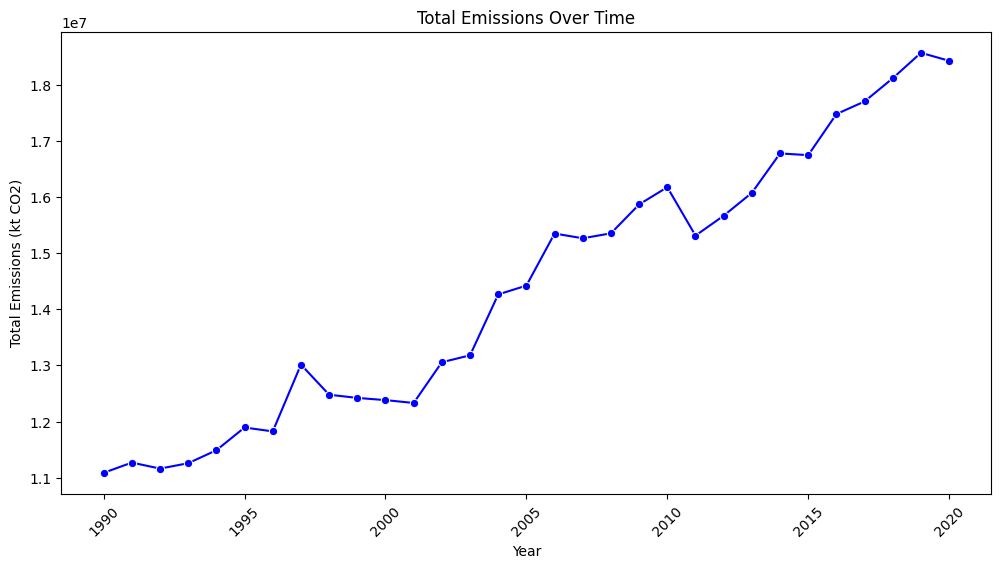

In [102]:
# Plotting total emissions over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped_by_year, x='year', y='total_emission', marker='o', color='blue')

# Adding title and labels
plt.title('Total Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Total Emissions (kt CO2)')
plt.xticks(rotation=45)
plt.show()


**`Emissions Over Time` Insight:**  
Total emissions have generally increased over the years, with some fluctuations. The lowest emissions occurred in 1990, while the highest were recorded in 2019, indicating a significant rise in emissions over the observed period.

**Trend of Average Temperature Over Time**

Similarly, we plot the trend of average temperature increase over time using a line plot.

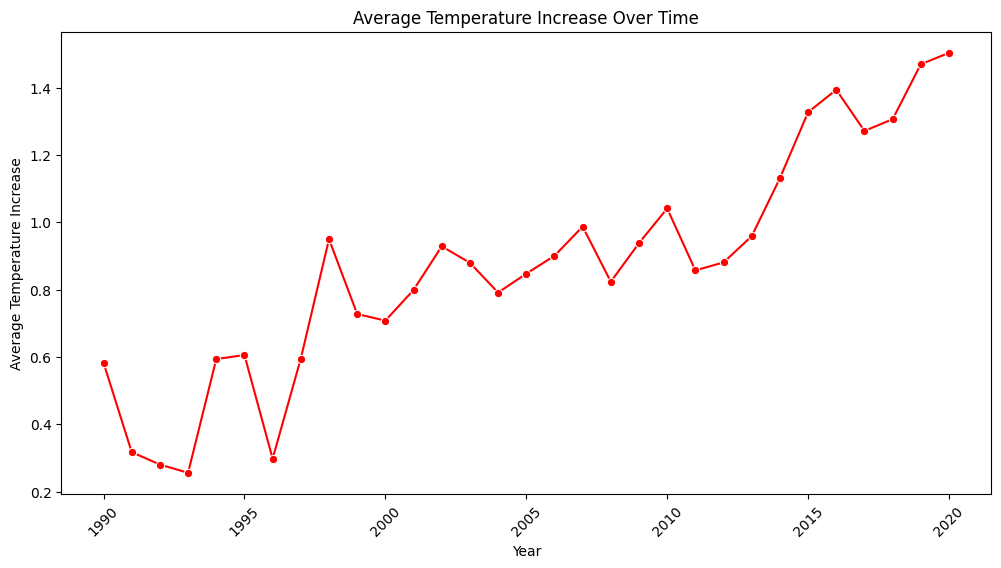

In [103]:
# Plotting average temperature increase over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped_by_year, x='year', y='average_temperature_change', marker='o', color='red')

# Adding title and labels
plt.title('Average Temperature Increase Over Time')
plt.xlabel('Year')
plt.ylabel('Average Temperature Increase')
plt.xticks(rotation=45)
plt.show()


**Average Temperature Increase Over Time Insight:**

- **General Trend:** The average temperature has generally increased over the years, with some fluctuations. The lowest temperature increase occurred in 1993, while the highest was recorded in 2020, showing a clear trend of rising temperatures over time.
  
- **Link to Emissions:** The increase in average temperature over time could be connected to rising emissions, especially since we observed that total emissions have also increased significantly, particularly between 1990 and 2019. This suggests a possible correlation between higher emissions and temperature rise, supporting the broader trend of global warming.

- **Climate Change Implications:** The data implies that the observed increase in temperature is likely related to human activities, such as higher energy consumption and agricultural practices, which have been strongly correlated with emissions. As emissions rise, they contribute to the greenhouse effect, leading to higher temperatures.

- **Fluctuations in Data:** Although the temperature increase shows an upward trend, fluctuations along the way could suggest that other factors, such as seasonal variations, environmental policies, or economic events, may have influenced temperature changes in certain years.

- **Year 2020 Spike:** The spike in average temperature in 2020, coinciding with the highest emissions year, may reflect the intensity of climate change or a shift in global warming patterns, which may be exacerbated by increased industrial activities and energy use.

**Stacked Bar Plot for Emissions by Source and Area Over Time**

We create a stacked bar plot to visualize the emissions by different sources across years and areas.

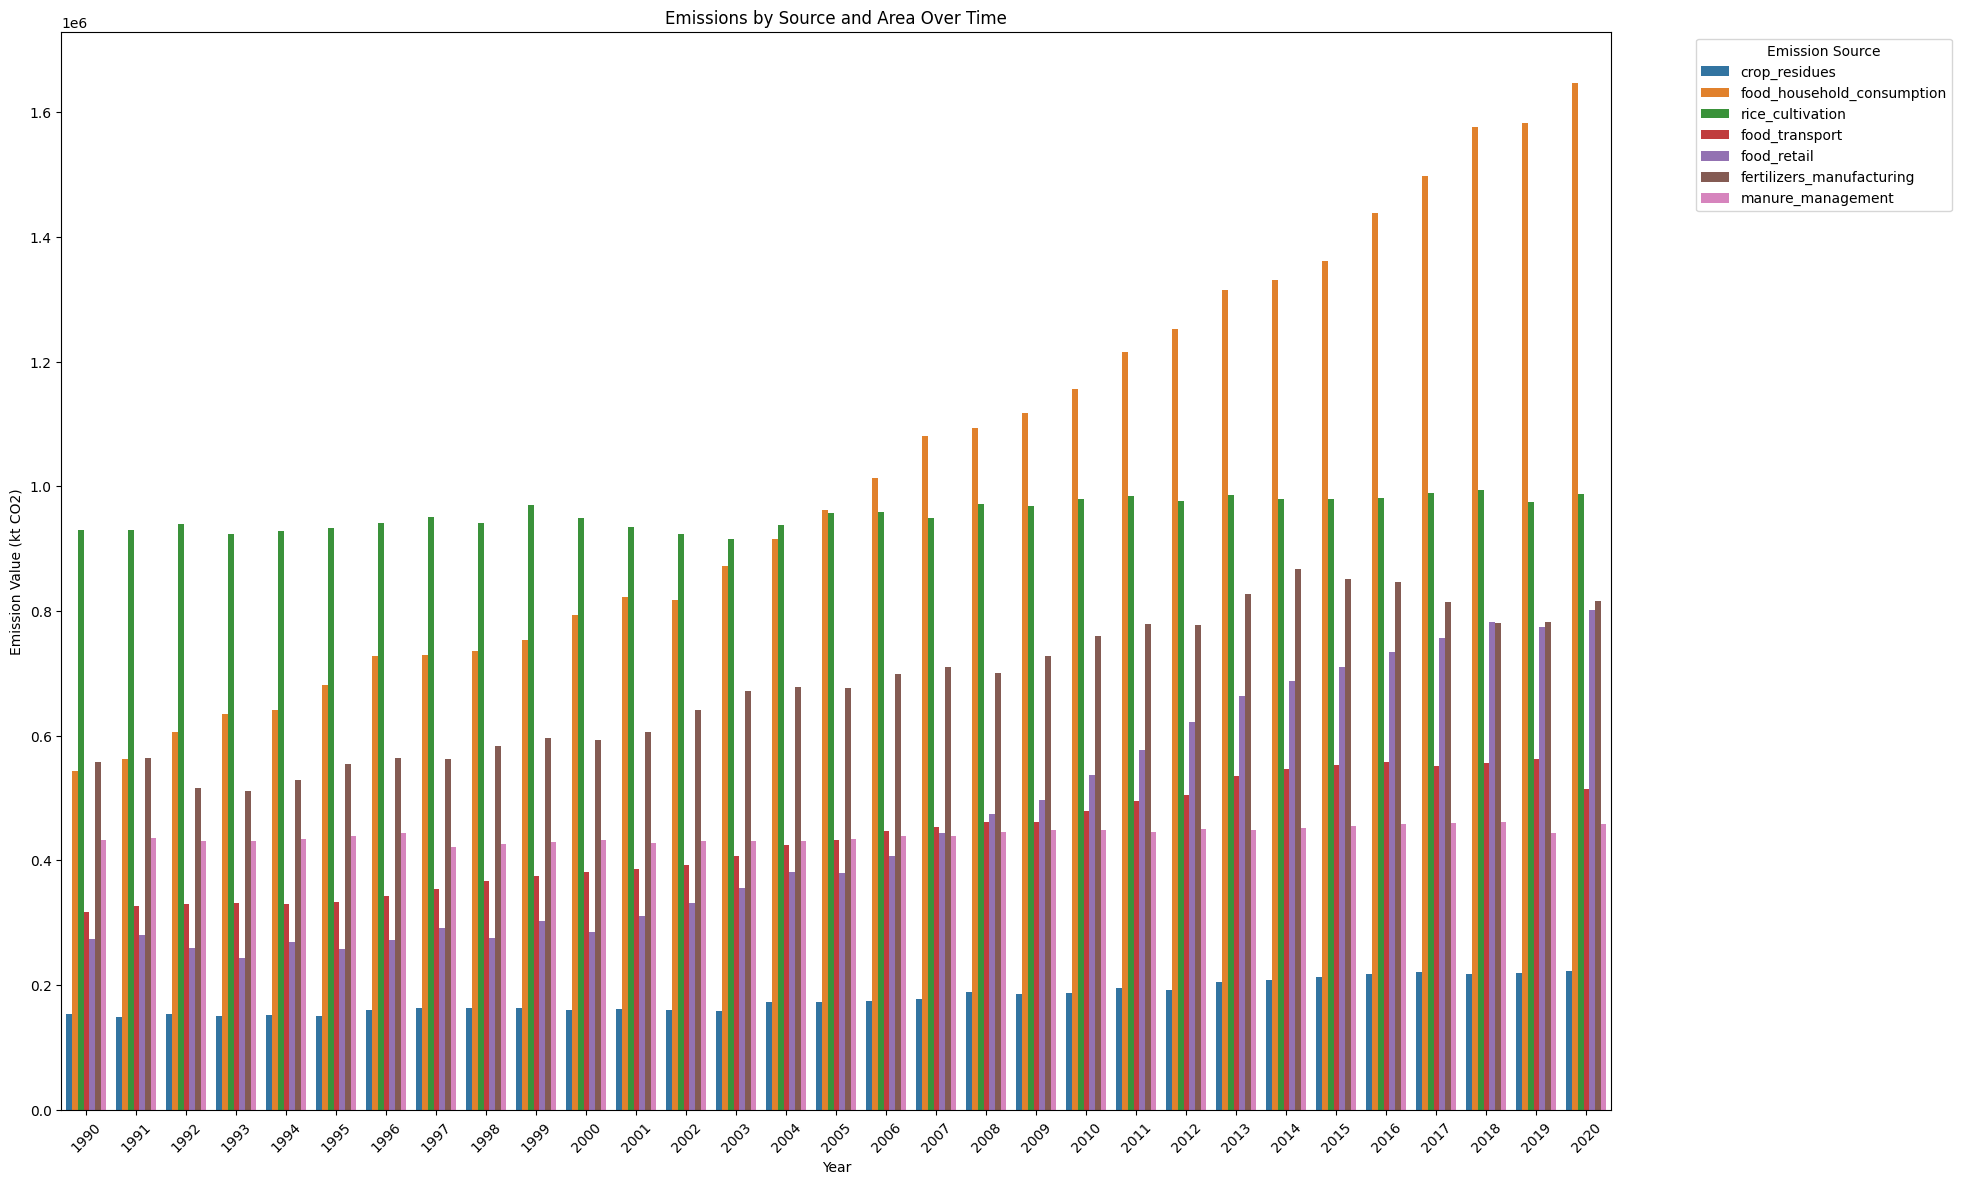

In [104]:
# Grouping data by 'year' and 'area' and aggregating key environmental factors
df_grouped_by_year_area = df.groupby(['year', 'area']).agg({
    'total_emission': 'sum',  # Total emissions for each area and year
    'average_temperature_change': 'mean',  # Average temperature change for each area and year
    'crop_residues': 'sum',
    'food_household_consumption': 'sum',
    'rice_cultivation': 'sum',
    'food_transport': 'sum',
    'food_retail': 'sum',
    'fertilizers_manufacturing': 'sum',
    'manure_management': 'sum',
}).reset_index()

# Displaying the first few rows of the grouped data
df_grouped_by_year_area.head()


# Melting the data to reshape for stacked bar plot
df_melted = df_grouped_by_year_area.melt(id_vars=['year', 'area'], 
                                         value_vars=['crop_residues', 'food_household_consumption', 
                                                     'rice_cultivation', 'food_transport', 'food_retail', 
                                                     'fertilizers_manufacturing', 'manure_management'],
                                         var_name='Emission Source', value_name='Emission Value')

# Plotting a stacked bar plot
plt.figure(figsize=(20, 14))
sns.barplot(data=df_melted, x='year', y='Emission Value', hue='Emission Source', estimator='sum', errorbar=None)

# Adding title and labels
plt.title('Emissions by Source and Area Over Time')
plt.xlabel('Year')
plt.ylabel('Emission Value (kt CO2)')
plt.xticks(rotation=45)
plt.legend(title='Emission Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**Stacked Bar Plot for Emissions by Source and Area Over Time Insight:**

- **Crop Residues:** This source has the lowest emissions compared to the other plotted sources. It has shown minimal changes over time, indicating that its contribution to total emissions has remained relatively stable.

- **Food Household Consumption:** This source has seen a consistent increase in emissions over the years. By 2005, it overtook **rice cultivation** as the highest source of emissions and continued to rise year over year. This suggests a growing environmental impact from food consumption, likely driven by population growth and increasing demand for food.

- **Rice Cultivation:** Rice cultivation had the highest emissions from 1990 to 2004. After 2005, however, emissions from rice cultivation declined in comparison to food household consumption. This shift might reflect changes in agricultural practices, efficiency improvements, or shifts in crop production.

- **General Trends:** The plot indicates that emissions from agricultural activities like **food household consumption** and **rice cultivation** are prominent contributors. While **crop residues** remain a low and stable source, the dominance of food-related emissions over time suggests an increasing role of consumption patterns in driving emissions.

- **Shifting Priorities:** The transition in dominant emission sources from **rice cultivation** to **food household consumption** around 2005 could signal changing global trends in food production, urbanization, and dietary habits, highlighting the importance of reducing emissions from food systems in future climate strategies.

**Total Emissions by Area**

We create a bar plot to visualize the total emissions by area.

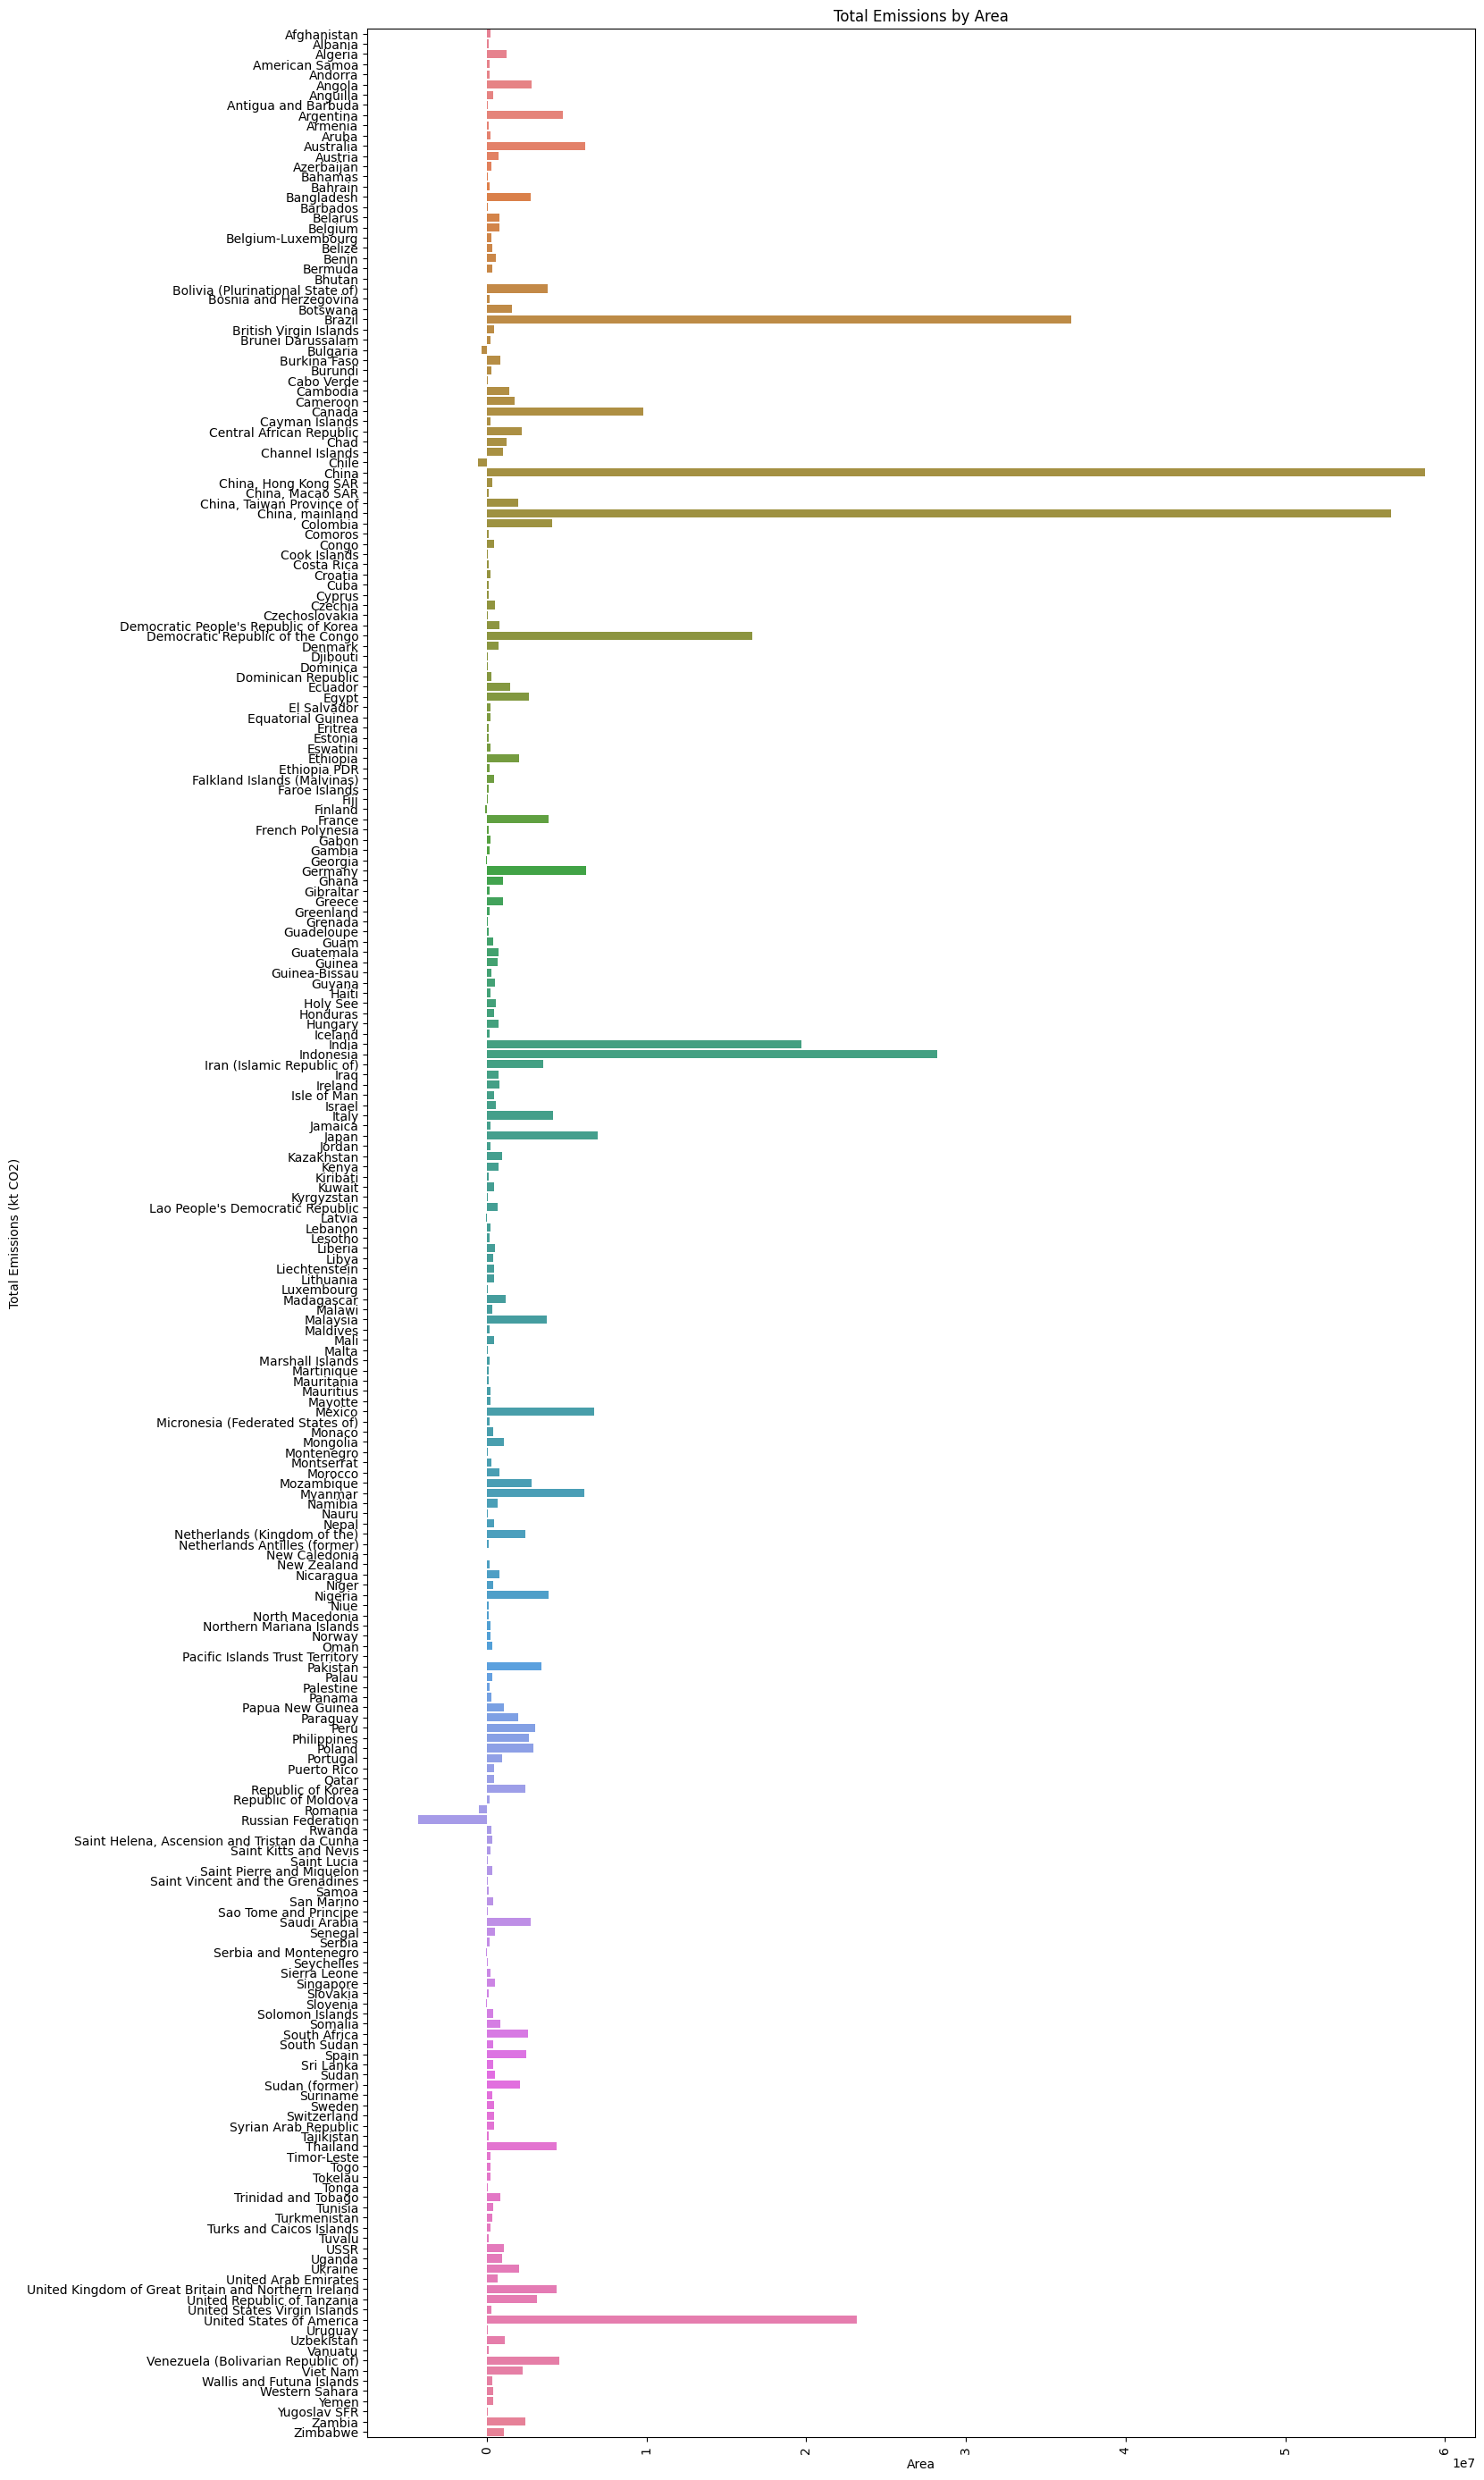

In [105]:
# Plotting total emissions by area
plt.figure(figsize=(16, 35))
sns.barplot(data=df_grouped_by_area, x='total_emission', y='area', hue='area', legend=False)

# Adding title and labels
plt.title('Total Emissions by Area')
plt.xlabel('Area')
plt.ylabel('Total Emissions (kt CO2)')
plt.xticks(rotation=90)
plt.show()


**Choropleth Map for Emissions by Area**

Lastly, we visualize the total emissions by country using a choropleth map.

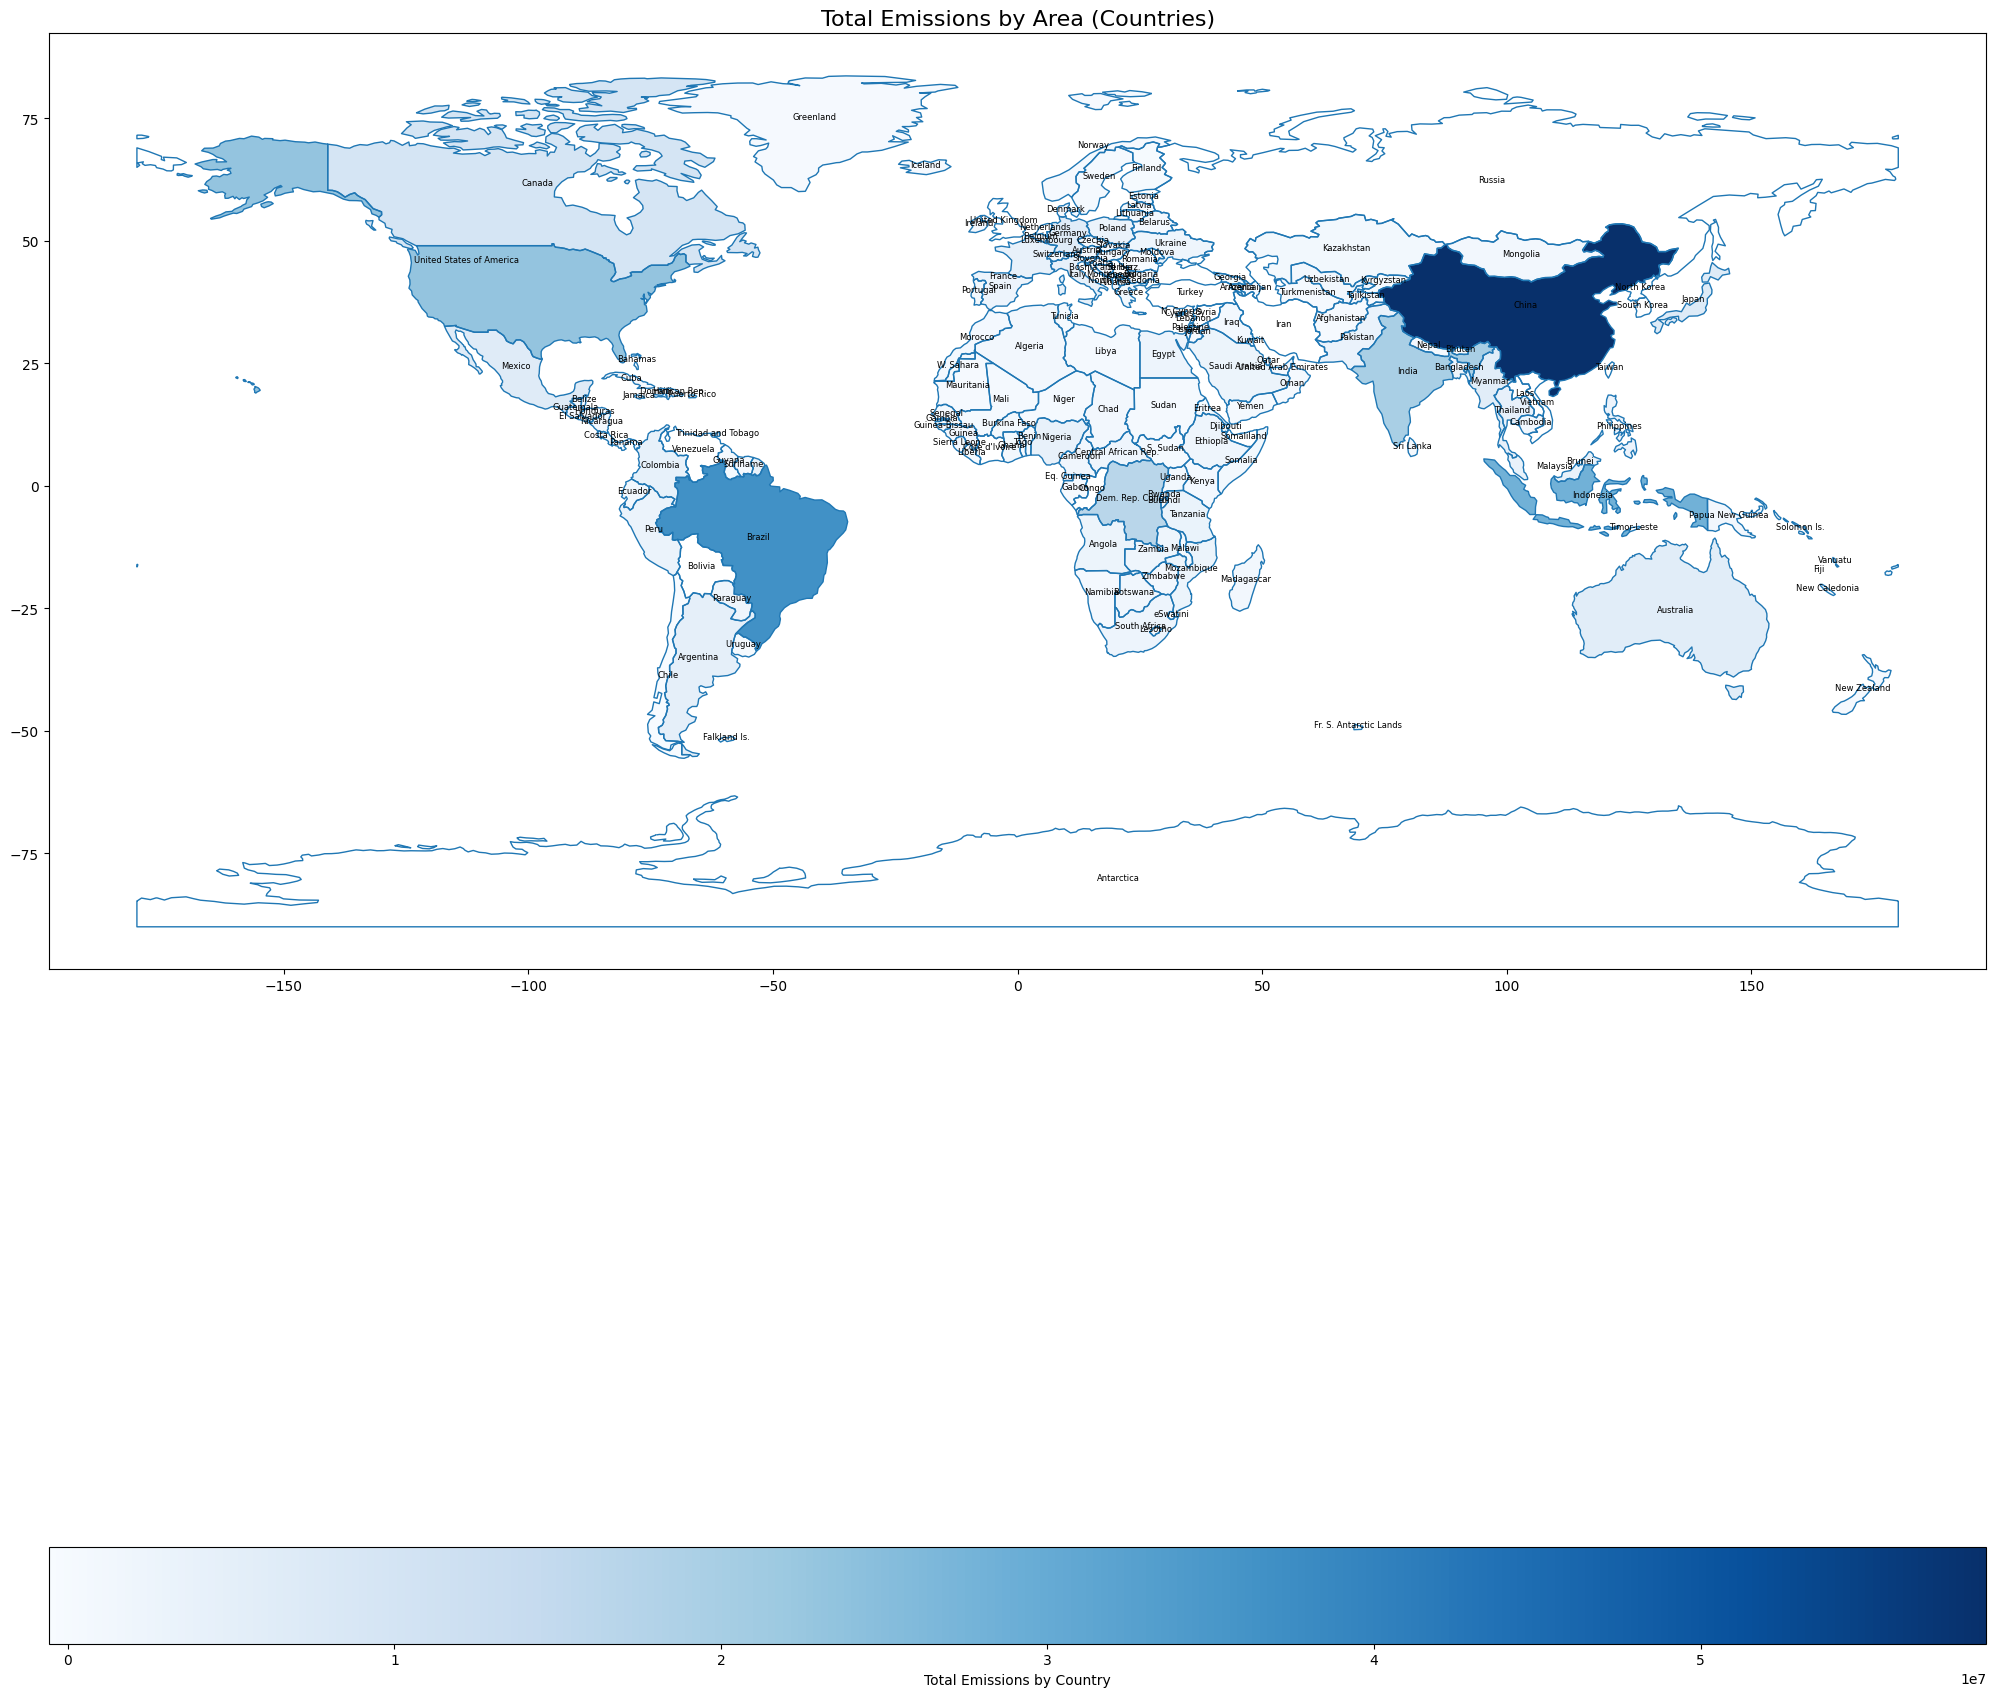

In [106]:
import geopandas as gpd

# Path to shapefile for world map
shapefile_path = "ne_110m_admin_0_countries"  # Update with correct path to shapefile

# Loading the shapefile
world = gpd.read_file(shapefile_path)

# Summing total emissions by area and merging with the world shapefile
df_map = df_grouped_by_year_area.groupby('area')['total_emission'].sum().reset_index()
world = world.merge(df_map, how="left", left_on="ADMIN", right_on="area")

# Plotting the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(25, 50))
world.boundary.plot(ax=ax, linewidth=1)
world.plot(column='total_emission', ax=ax, legend=True,
           cmap='Blues',  # Using a color palette for the map
           legend_kwds={'label': "Total Emissions by Country",
                        'orientation': "horizontal"})

# Adding labels to the map
for idx, row in world.iterrows():
    ax.annotate(text=row['NAME'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=6, color='black')

# Adding title and showing the plot
plt.title('Total Emissions by Area (Countries)', fontsize=16)
plt.show()


**Total Emissions by Area Insight:**

- **Highest Emissions:** **China** has the highest total emissions, followed by **Brazil**, **the USA**, and **Russia**. This reflects the large-scale industrial activity, population size, and economic development in these countries, which are major contributors to global emissions.

- **Lower Emissions:** Countries like **Romania**, **Bulgaria**, and **Chile** have the lowest total emissions. These nations may have smaller industrial sectors, lower population densities, or greater reliance on renewable energy sources, which contribute to their relatively low emission levels.

- **Global Disparities:** The stark contrast between high-emission countries (such as China, Brazil, and the USA) and low-emission countries (like Romania and Bulgaria) highlights global disparities in industrialization, energy consumption, and environmental policies. 

- **Economic and Industrial Factors:** The higher emissions in China, the USA, and Russia are likely driven by their large industrial bases, energy consumption patterns (often relying on fossil fuels), and high levels of manufacturing and transportation emissions.

- **Potential for Emission Reduction:** Countries with lower emissions, like **Chile** and **Romania**, may offer valuable insights into more sustainable practices and policies that could help mitigate global emissions, such as investing in cleaner energy sources or promoting sustainable agriculture.

## 6. Feature Engineering <a class="anchor" id="chapter6"></a>

*Brief section introduction

In [107]:
# Cell 5: Create New Features
def create_new_features(df):
    df['urban_rural_ratio'] = df['urban_population'] / (df['rural_population'] + 1e-6)
    df['population_density'] = df['female_population'] + df['male_population']

    log_features = ['on_farm_energy_use', 'fires_in_humid_tropical_forests', 'manure_management']
    for feature in log_features:
        df[f'log_{feature}'] = np.log1p(df[feature])
        
    df['temperature_squared'] = df['average_temperature_change'] ** 2
    df['temperature_cubed'] = df['average_temperature_change'] ** 3

    # Interaction terms
    df['urban_on_farm_interaction'] = df['urban_population'] * df['on_farm_energy_use']

    # Binning continuous features
    df['temperature_bin'] = pd.cut(df['average_temperature_change'], bins=5, labels=False)
    
    return df

df = create_new_features(df)

# Cell 6: Handling Categorical Data
if 'area' in df.columns:
    df = pd.get_dummies(df, columns=['area'], drop_first=True)

# Cell 7: Scaling Continuous Features
def scale_features(df):
    continuous_features = [
        'average_temperature_change', 'female_population', 'male_population',
        'urban_population', 'rural_population', 'on_farm_energy_use'
    ]

    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df[continuous_features])
    df_scaled = pd.DataFrame(df_scaled, columns=continuous_features)

    df[continuous_features] = df_scaled
    return df

df = scale_features(df)

# Cell 8: Feature Selection - Removing Highly Correlated Features
def remove_highly_correlated_features(df, correlation_threshold=0.8):
    correlation_matrix = df.corr()

    high_corr_features = [
        column for column in correlation_matrix.columns
        if any(abs(correlation_matrix[column]) > correlation_threshold)
    ]

    if high_corr_features:
        df = df.drop(columns=[high_corr_features[0]])  
    
    return df

df = remove_highly_correlated_features(df)

# Cell 9: Handling Outliers
def detect_outliers(df):
    z_scores = df.apply(zscore)
    outliers = (z_scores.abs() > 3).any(axis=1)
    df_no_outliers = df[~outliers]
    print(f"Data shape after removing outliers: {df_no_outliers.shape}")
    return df_no_outliers

df = detect_outliers(df)

# Cell 10: Final Data Overview
df.head()


NameError: name 'zscore' is not defined

*Insights

## 7. Model Development <a class="anchor" id="chapter7"></a>

*Brief section introduction

In [ ]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Categorical columns: {categorical_columns}")

Categorical columns: ['area']


*Insights/comments

In [ ]:
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

num_independent_vars = df_encoded.shape[1]

print(f"Number of independent variables after dummy encoding: {num_independent_vars-1}") #subtract 1 for emissions

Number of independent variables after dummy encoding: 264


In [ ]:
df_encoded.head()

,year,savanna_fires,forest_fires,crop_residues,rice_cultivation,drained_organic_soils,pesticides_manufacturing,food_transport,forestland,net_forest_conversion,...,area_Uzbekistan,area_Vanuatu,area_Venezuela (Bolivarian Republic of),area_Viet Nam,area_Wallis and Futuna Islands,area_Western Sahara,area_Yemen,area_Yugoslav SFR,area_Zambia,area_Zimbabwe
0,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,0.0,...,False,False,False,False,False,False,False,False,False,False
1,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,0.0,...,False,False,False,False,False,False,False,False,False,False
2,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,0.0,...,False,False,False,False,False,False,False,False,False,False
3,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,0.0,...,False,False,False,False,False,False,False,False,False,False
4,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,0.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_encoded = df_encoded.map(lambda x: 1 if x is True else (0 if x is False else x))
df_encoded

,year,savanna_fires,forest_fires,crop_residues,rice_cultivation,drained_organic_soils,pesticides_manufacturing,food_transport,forestland,net_forest_conversion,...,area_Uzbekistan,area_Vanuatu,area_Venezuela (Bolivarian Republic of),area_Viet Nam,area_Wallis and Futuna Islands,area_Western Sahara,area_Yemen,area_Yugoslav SFR,area_Zambia,area_Zimbabwe
0,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,0.0000,...,0,0,0,0,0,0,0,0,0,0
1,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,0.0000,...,0,0,0,0,0,0,0,0,0,0
2,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,0.0000,...,0,0,0,0,0,0,0,0,0,0
3,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,0.0000,...,0,0,0,0,0,0,0,0,0,0
4,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,0.0000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,10662.4408,...,0,0,0,0,0,0,0,0,0,1
6961,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,10662.4408,...,0,0,0,0,0,0,0,0,0,1
6962,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,10662.4408,...,0,0,0,0,0,0,0,0,0,1
6963,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,10662.4408,...,0,0,0,0,0,0,0,0,0,1


Multiple Linear Regression - MSE: 0.1484, R^2: 0.5159
Ridge Regression - MSE: 0.1483, R^2: 0.5163
Lasso Regression - MSE: 0.2222, R^2: 0.2753
Decision Tree Regressor - MSE: 0.2083, R^2: 0.3205
Random Forest Regressor - MSE: 0.1109, R^2: 0.6383


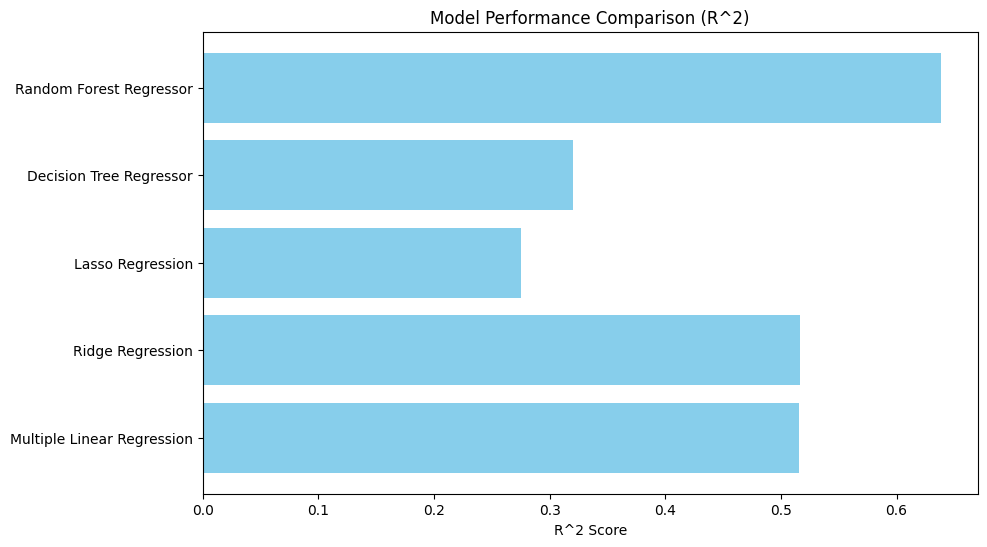

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming df_encoded is your dataframe and 'target_column' is your dependent variable
X = df_encoded.drop('average_temperature_change', axis=1)  # Drop the target variable
y = df_encoded['average_temperature_change']  # Target variable

# Step 1: Train-Test Split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Define the models
models = {
    'Multiple Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Step 4: Train and evaluate each model
results = {}

for model_name, model in models.items():
    # Fit the model
    model.fit(X_train_scaled, y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results[model_name] = {'MSE': mse, 'R2': r2}
    
    print(f"{model_name} - MSE: {mse:.4f}, R^2: {r2:.4f}")


model_names = list(results.keys())
r2_scores = [result['R2'] for result in results.values()]

plt.figure(figsize=(10, 6))
plt.barh(model_names, r2_scores, color='skyblue')
plt.xlabel('R^2 Score')
plt.title('Model Performance Comparison (R^2)')
plt.show()



1. **Multiple Linear Regression**:
   - **MSE**: 0.1484
   - **R²**: 0.5159
   - **Interpretation**: The Multiple Linear Regression model shows moderate performance, with an R² value of 0.5159, meaning it explains about 51.6% of the variance in `average_temperature_change`. The MSE value of 0.1484 indicates that there is some error in the model's predictions.

2. **Ridge Regression**:
   - **MSE**: 0.1483
   - **R²**: 0.5163
   - **Interpretation**: Ridge Regression performs very similarly to Multiple Linear Regression, with only a slight improvement in R² (0.5163). The slight difference in MSE and R² values suggests that regularization (which Ridge applies) doesn't significantly affect the model's performance for this dataset. It does indicate that the model might have benefitted slightly from penalizing large coefficients.

3. **Lasso Regression**:
   - **MSE**: 0.2222
   - **R²**: 0.2753
   - **Interpretation**: Lasso Regression has a noticeably higher MSE and much lower R² compared to the other models. The lower R² value (0.2753) indicates that Lasso Regression explains only 27.5% of the variance in the target variable. The higher MSE (0.2222) indicates that Lasso may be underfitting the data, potentially due to the strong regularization (penalizing too many coefficients to zero).

4. **Decision Tree Regressor**:
   - **MSE**: 0.2083
   - **R²**: 0.3205
   - **Interpretation**: The Decision Tree Regressor has a moderate R² of 0.3205, meaning it explains 32.05% of the variance in the data. It has a relatively high MSE (0.2083), which suggests that the tree might be overfitting the data (capturing too much noise). Decision Trees tend to overfit, especially when they are not properly pruned or tuned.

5. **Random Forest Regressor**:
   - **MSE**: 0.1109
   - **R²**: 0.6383
   - **Interpretation**: The Random Forest Regressor outperforms all other models in both MSE and R². The R² value of 0.6383 indicates that it explains 63.83% of the variance in `average_temperature_change`. The MSE of 0.1109 is the lowest, indicating fewer prediction errors compared to the other models. Random Forest, being an ensemble of decision trees, generally performs better as it averages multiple models to reduce overfitting and improve predictive accuracy.

### Insights:
- **Best Model**: The **Random Forest Regressor** is the best-performing model with the lowest MSE and the highest R², suggesting it generalizes better and provides more accurate predictions compared to the other models.
- **Good Performance**: **Multiple Linear Regression** and **Ridge Regression** both perform reasonably well, with similar results indicating that regularization doesn't significantly improve performance in this case.
- **Underperforming Models**: **Lasso Regression** and **Decision Tree Regressor** show lower performance, with Lasso having a noticeably high MSE and low R², and Decision Tree showing moderate performance but likely overfitting the data.

Given these results, you can conclude that for predicting `average_temperature_change`, the **Random Forest Regressor** is the most effective model, but you might also consider tuning the Decision Tree or experimenting with different values of regularization for Ridge and Lasso to further optimize their performance.

## 8. Model Performance <a class="anchor" id="chapter8"></a>

*Brief section introduction

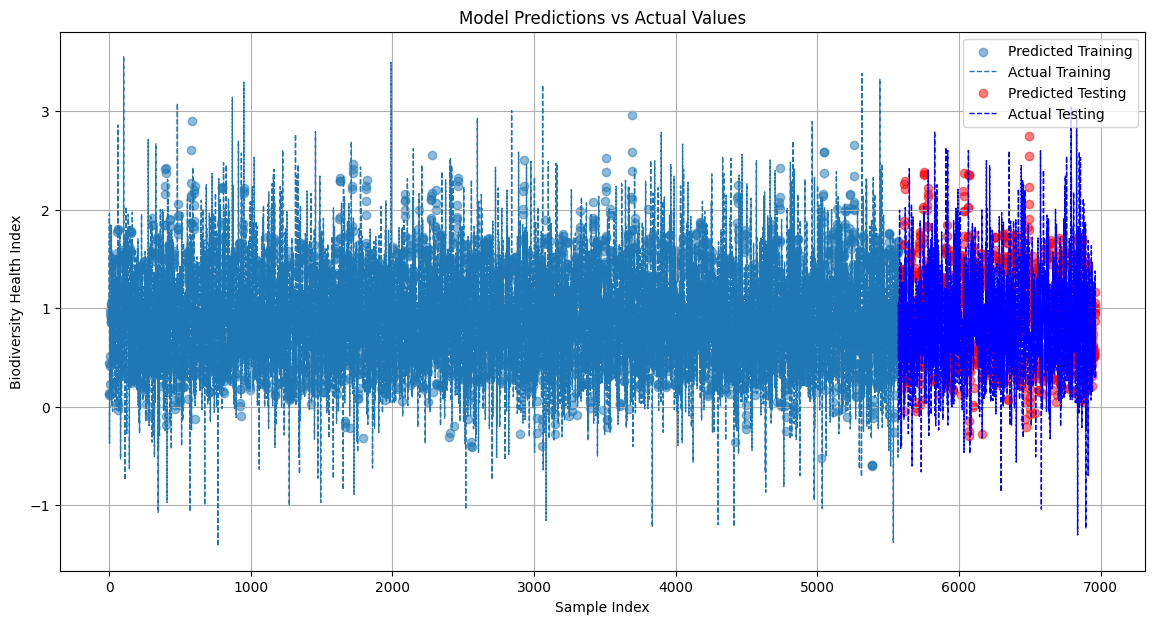

In [ ]:
X_scaled = scaler.fit_transform(X)
X_standardised = pd.DataFrame(X_scaled, columns=X.columns)
# Predictions
y_pred_train = models['Random Forest Regressor'].predict(X_standardised.iloc[:len(y_train)])
y_pred_test = models['Random Forest Regressor'].predict(X_standardised.iloc[len(y_train):])

plt.figure(figsize=(14, 7))  # Plot size

# Plot training predictions and actual values
plt.scatter(np.arange(len(y_train)), y_pred_train, label='Predicted Training', alpha=0.5)
plt.plot(np.arange(len(y_train)), y_train, label='Actual Training', linestyle='--', linewidth=1)

# Plot testing predictions and actual values
plt.scatter(np.arange(len(y_test)) + len(y_train), y_pred_test, label='Predicted Testing', alpha=0.5, color='red')
plt.plot(np.arange(len(y_test)) + len(y_train), y_test, label='Actual Testing', linestyle='--', linewidth=1, color='blue')

plt.legend()
plt.title('Model Predictions vs Actual Values')
plt.xlabel('Sample Index')
plt.ylabel('average_temperature_change')
plt.grid(True)  # Add gridlines

plt.show()

The plot indicates that the Random Forest Regressor predicts both the training and testing data with moderate success, showing some alignment with the average_temperature_change values. There is a consistent scatter across the range, suggesting the model's effectiveness in handling diverse data without significant overfitting.

## 9. Conclusion and Recommendations <a class="anchor" id="chapter9"></a>

*Summarise Insights
*Offer recommendations such as sustainable agricultural practices